Ce notebook vise à nettoyer les datastes concernant les équipements de tennis 

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.pyplot as plt
import json
import os
import csv
import re

1. Dataset  bpe_sport_loisir

In [28]:
df_bpe = pd.read_excel('bpe_sport_loisir.xlsx')
df_bpe.head()

,Libellé
0,nombre d'équipements 2017 - Bassin de natation
1,NaN
2,Source
3,"Insee, Base permanente des équipements"
4,NaN


------------------------------------------------------------------------------ FIN bpe_sport_loisir ------------------------------------------------------------------------------------

2. Dataset 'data_es' 

In [29]:
df_es = pd.read_excel('data_es.xlsx')
df_es.head()

,Numéro de l'installation sportive,Nom de l'installation sportive,Adresse,Code Postal,Code INSEE (sans mise à jour),Commune (sans mise à jour),Commune INSEE,Commune Nom,Statut de la fiche d'enquête,Etat de la fiche d'enquête,...,Arrondissement Nom,Département Code,Département Code Complet,Département Nom,Réctorat Nom,Région Code,Région Nom,Densite Niveau,Densite Catégorie,ZRR Simplifié
0,I010040012,Parc des sports,435 Avenue de Mering,1500,1004,Ambérieu-en-Bugey,1004,Ambérieu-en-Bugey,True,Validé,...,Belley,1,1,Ain,Académie de Lyon,84.0,Auvergne-Rhône-Alpes,2.0,Centres urbains intermédiaires,NC - Commune non classée
1,I010040012,Parc des sports,435 Avenue de Mering,1500,1004,Ambérieu-en-Bugey,1004,Ambérieu-en-Bugey,True,Validé,...,Belley,1,1,Ain,Académie de Lyon,84.0,Auvergne-Rhône-Alpes,2.0,Centres urbains intermédiaires,NC - Commune non classée
2,I010100005,TERRAINS DE SPORT MUNICIPAUX,118 rue du stade,1350,1010,Anglefort,1010,Anglefort,True,Validé,...,Belley,1,1,Ain,Académie de Lyon,84.0,Auvergne-Rhône-Alpes,5.0,Bourgs ruraux,NC - Commune non classée
3,I010140005,"TENNIS de ""LETRAT""",Avenue Général ANDREA LETRAT,1100,1014,Arbent,1014,Arbent,True,Validé,...,Nantua,1,1,Ain,Académie de Lyon,84.0,Auvergne-Rhône-Alpes,4.0,Ceintures urbaines,NC - Commune non classée
4,I010210003,TENNIS CLUB DU HAUT FORMANS,chemin du château,1480,1021,Ars-sur-Formans,1021,Ars-sur-Formans,True,Validé,...,Bourg-en-Bresse,1,1,Ain,Académie de Lyon,84.0,Auvergne-Rhône-Alpes,5.0,Bourgs ruraux,NC - Commune non classée


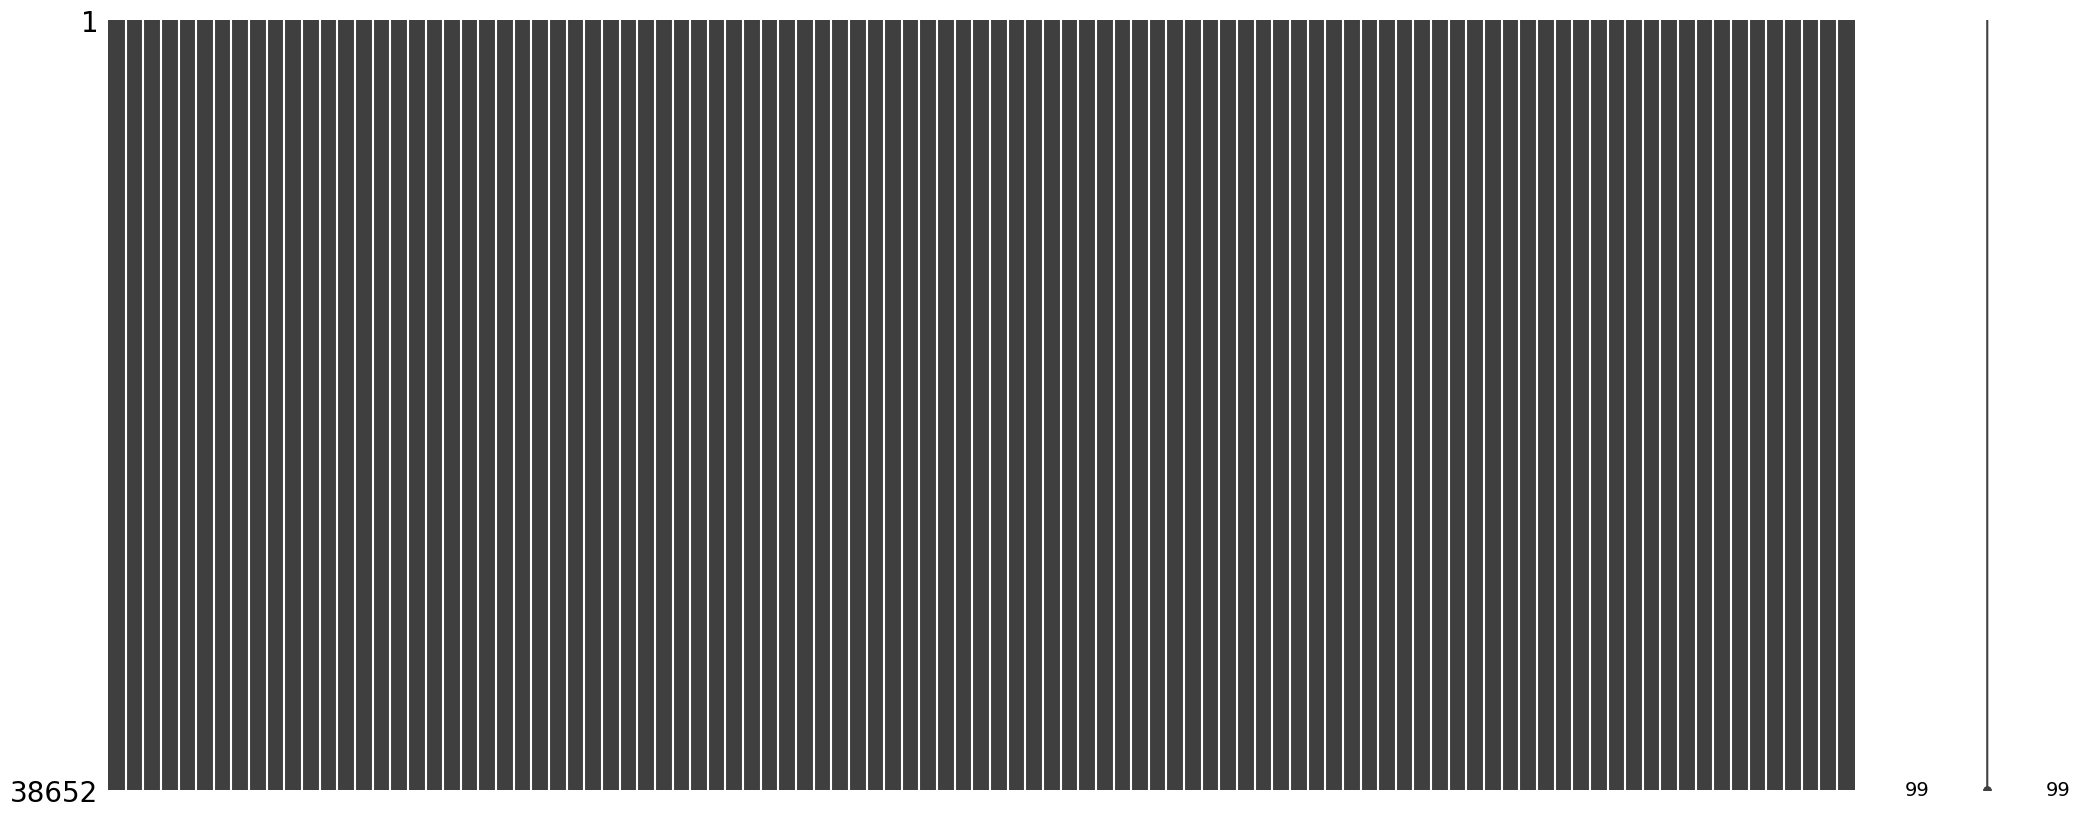

In [30]:
df_es = df_es.dropna(axis=1, how='all')
colonnes_a_supprimer = ['Numéro de l\'installation sportive', 
                        'Code INSEE (sans mise à jour)', 
                        'Commune (sans mise à jour)', 
                        'Département Code', 
                        'Département Code Complet', 
                        'Région Code']
df_es = df_es.drop(columns=colonnes_a_supprimer)
df_es = df_es.fillna(0)
df_es = df_es.replace({'VRAI': 1, 'FAUX': 0})
msno.matrix(df_es)
plt.show()

In [31]:
df_es.to_excel('ata_es_nettoye.xlsx', index=False)

---------------------------------------------------------------------------------- FIN DATA_ES -------------------------------------------------------------------------------------------------

3. Dataset 'fr-en-dataes-types-d-equipement' 

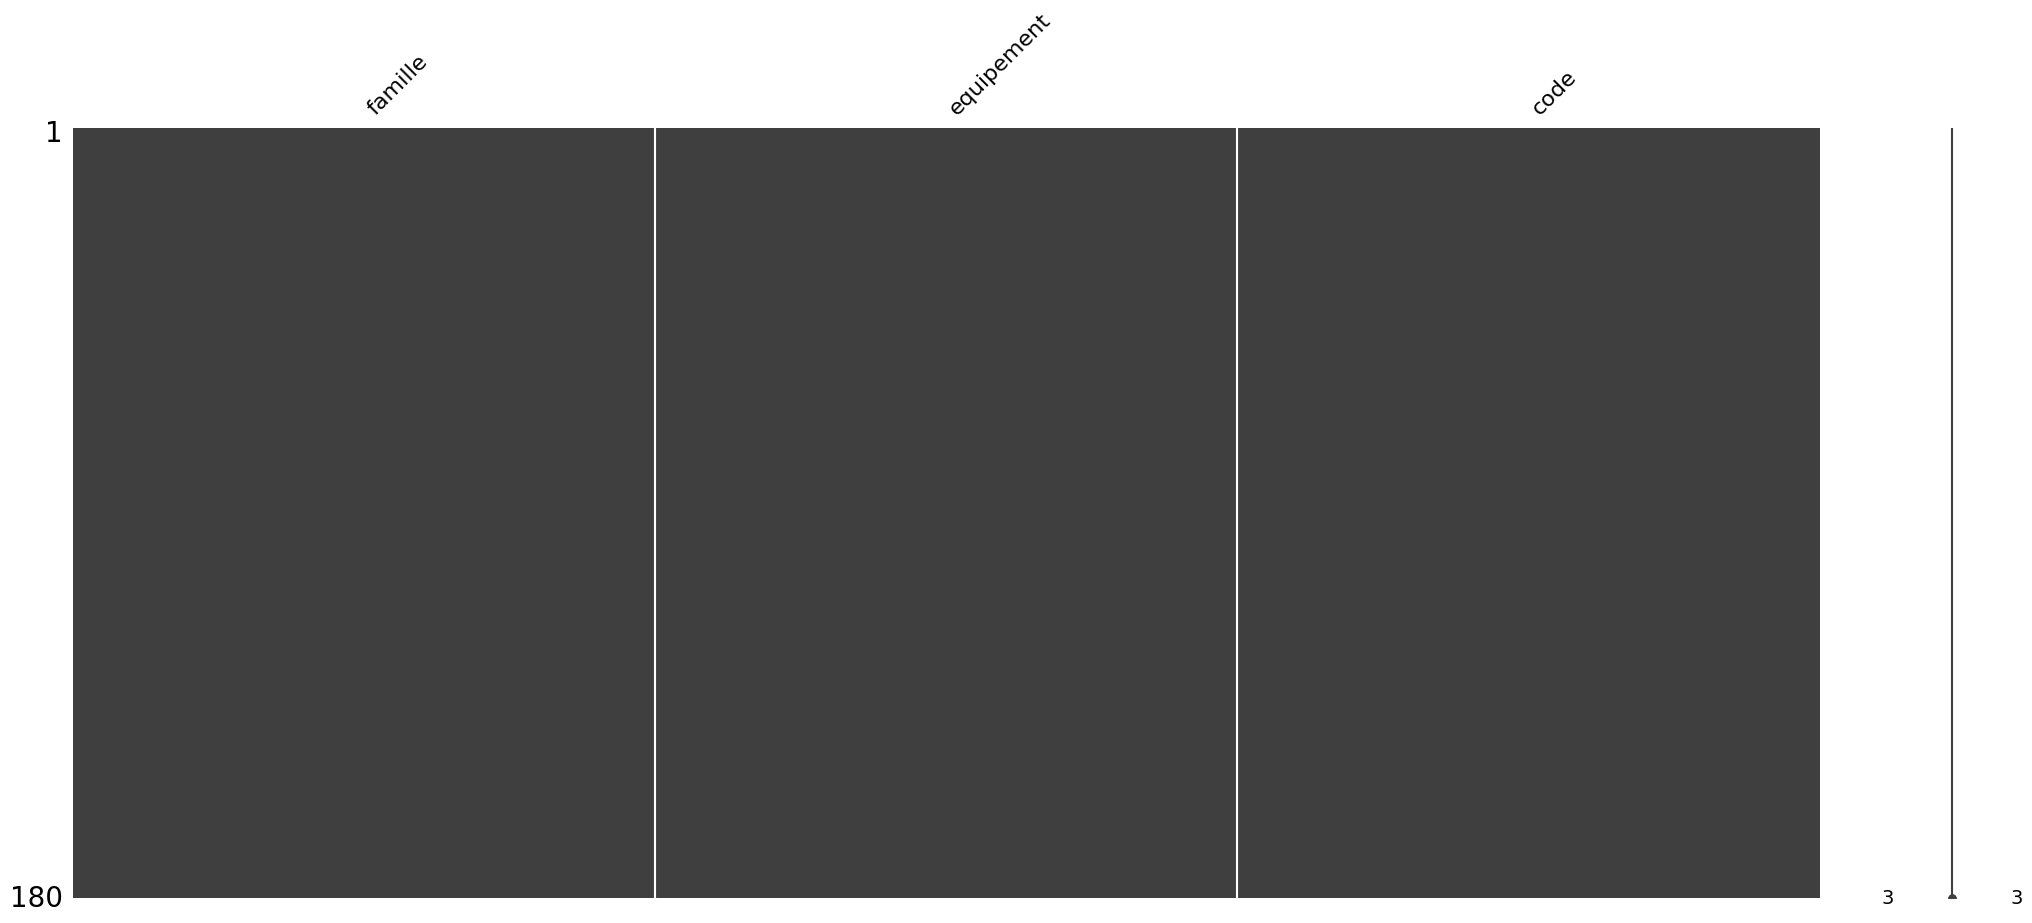

In [33]:
df_fr_eq = pd.read_excel('fr-en-dataes-types-d-equipement.xlsx')
msno.matrix(df_fr_eq)
plt.show()

---------------------------------------------------------------------------- FIN DATASET 3 ---------------------------------------------------------------------------------

4. Dataset 'OBJ_Bilans20152016' 

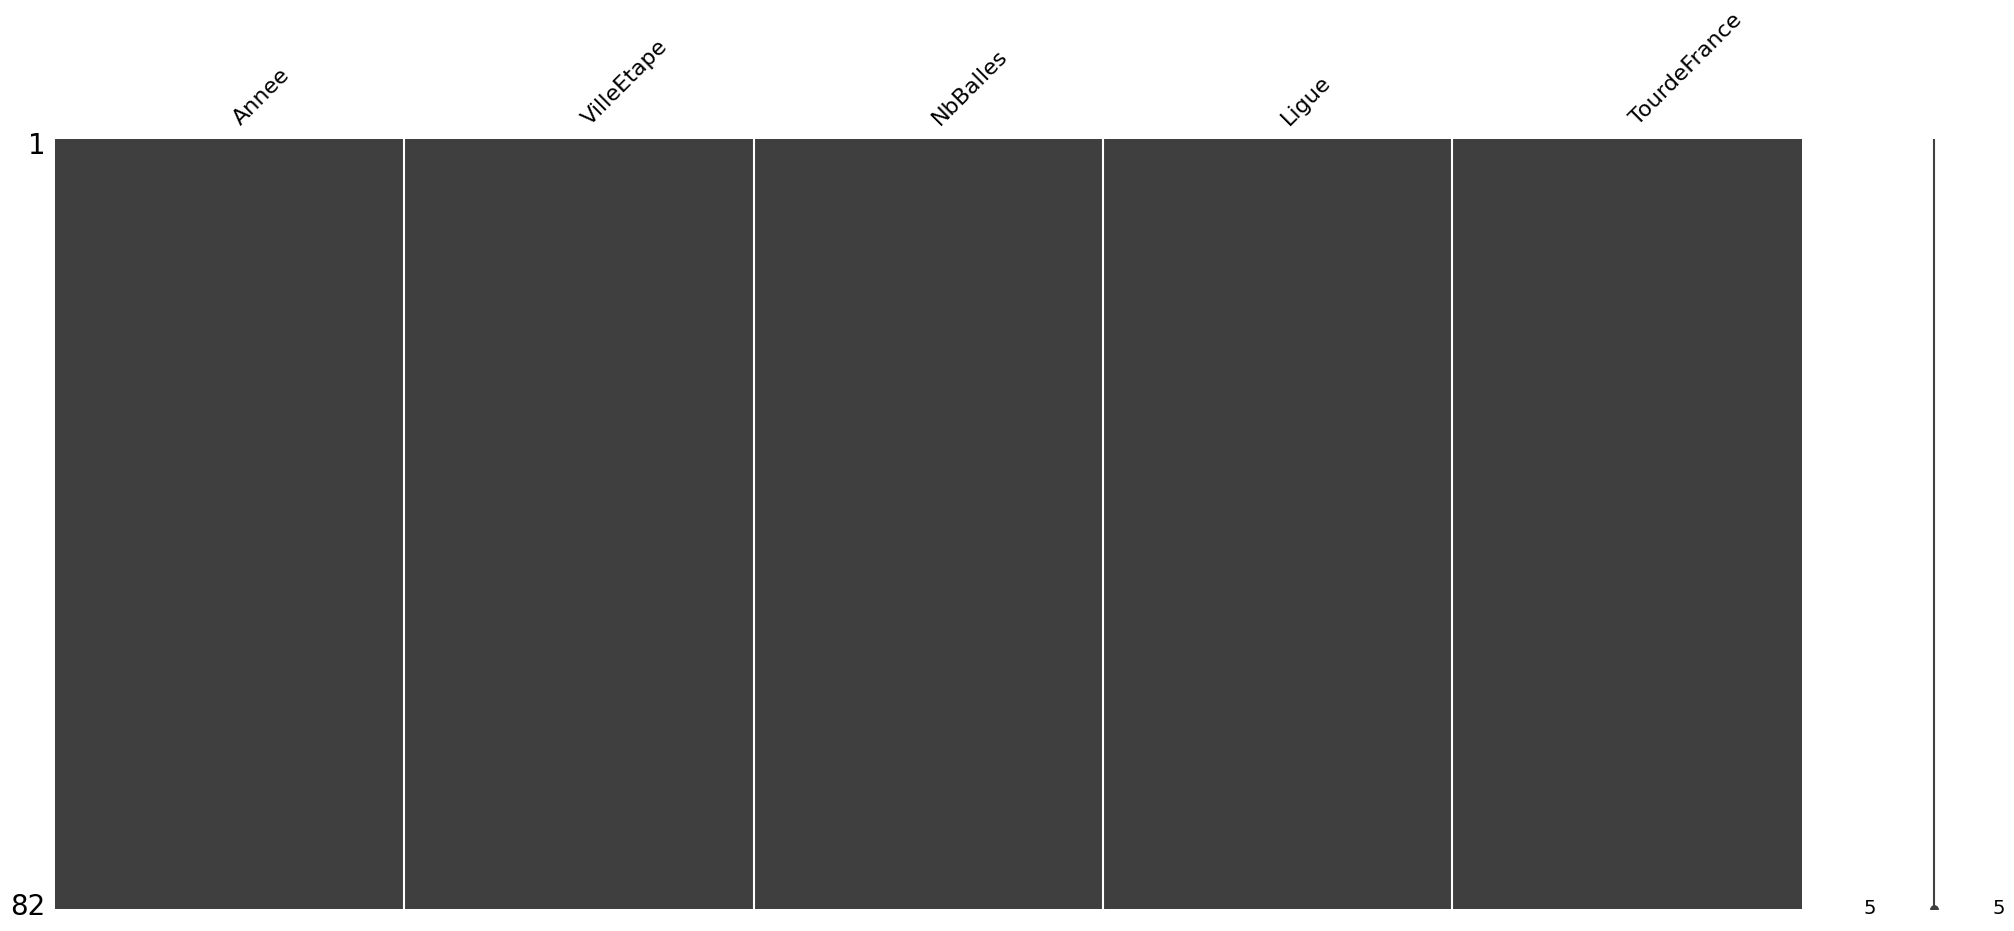

In [34]:
df_balles = pd.read_excel('OBJ_Bilans20152016.xlsx')
msno.matrix(df_balles)
plt.show()

------------------------------------------------------------------ FIN DATASET BALLES ----------------------------------------------------------------------------------------------

5. Dataset 'recensement-des-equipements-sportifs' 

In [35]:
df_re_eq = pd.read_excel('recensement-des-equipements-sportifs.xlsx')
df_re_eq.head()

,DepCode,DepLib,ComInsee,ComLib,InsNumeroInstall,InsNom,EquipementId,EquNbEquIdentique,ActCode,Sport / Activité,...,InsNoVoie,InsLibelleVoie,InsCodePostal,Utilisation,Utilisateurs,typeerp,EquipementTypeCode,EquipementTypeLib,InsArrondissement,Famille type d'équipement
0,95,Val-d'Oise,95110,Brignancourt,951100001,Stade Municipal,157164,1,7901,Tennis,...,NaN,Rue de la Jeunesse,95640.0,Récréation sportive,Clubs sportifs / Comités / Ligues / Fédération...,Établissement de plein air,501,Court de tennis,NaN,Court de tennis
1,95,Val-d'Oise,95127,Cergy,951270062,Île de loisirs de Cergy-Neuville,154884,1,7901,Tennis,...,NaN,Rue des Etangs,95000.0,"Récréation sportive,Performance sportive","Scolaires / Universités,Autre(s) association(s...",Établissement de plein air,501,Court de tennis,NaN,Court de tennis
2,95,Val-d'Oise,95127,Cergy,951270016,Groupe Scolaire le Point du Jour,159135,1,7901,Tennis,...,NaN,Passage de l'Eveil,95000.0,Récréation sportive,"Scolaires / Universités,Autre(s) association(s...",NaN,1701,Plateau EPS/Multisports/city-stades,NaN,Plateau EPS
3,95,Val-d'Oise,95197,Deuil-la-Barre,951970012,Tennis Club de la Source,154935,2,7901,Tennis,...,NaN,Rue des Martinets,95170.0,Formation sportive,Individuel(s) / Famille(s),Établissement de plein air,501,Court de tennis,NaN,Court de tennis
4,95,Val-d'Oise,95199,Domont,951990008,Tennis des Beursillons,154959,4,7901,Tennis,...,NaN,Chemin des Beursillons,95330.0,Formation sportive,Clubs sportifs / Comités / Ligues / Fédérations,Établissement sportif couvert;Établissement de...,501,Court de tennis,NaN,Court de tennis


In [27]:
df = pd.read_csv('fr-en-dataes-types-d-equipement.csv', sep=';')
df.to_excel('fr-en-dataes-types-d-equipement.xlsx', index=False)